In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [18]:
df=pd.read_csv("C://Users//HP//rasa//Downloads/1_PelicanStores(n Regression).csv")

In [19]:
df.head()

,Customer,Type of Customer,Items,Net Sales,Method of Payment,Gender,Marital Status,Age,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,Regular,1,39.5,Discover,Male,Married,32,NaN,NaN,NaN,NaN,NaN
1,2,Promotional,1,102.4,Proprietary Card,Female,Married,36,NaN,NaN,NaN,NaN,NaN
2,3,Regular,1,22.5,Proprietary Card,Female,Married,32,NaN,NaN,NaN,NaN,NaN
3,4,Promotional,5,100.4,Proprietary Card,Female,Married,28,NaN,NaN,NaN,NaN,NaN
4,5,Regular,2,54.0,MasterCard,Female,Married,34,NaN,NaN,NaN,NaN,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer           100 non-null    int64  
 1   Type of Customer   100 non-null    object 
 2   Items              100 non-null    int64  
 3   Net Sales          100 non-null    float64
 4   Method of Payment  100 non-null    object 
 5   Gender             100 non-null    object 
 6   Marital Status     100 non-null    object 
 7   Age                100 non-null    int64  
 8   Unnamed: 8         0 non-null      float64
 9   Unnamed: 9         0 non-null      float64
 10  Unnamed: 10        0 non-null      float64
 11  Unnamed: 11        0 non-null      float64
 12  Unnamed: 12        0 non-null      float64
dtypes: float64(6), int64(3), object(4)
memory usage: 10.3+ KB


In [24]:
#remove the nonuse columns

In [22]:
df1=df.iloc[0:,0:8]

In [23]:
df1

,Customer,Type of Customer,Items,Net Sales,Method of Payment,Gender,Marital Status,Age
0,1,Regular,1,39.50,Discover,Male,Married,32
1,2,Promotional,1,102.40,Proprietary Card,Female,Married,36
2,3,Regular,1,22.50,Proprietary Card,Female,Married,32
3,4,Promotional,5,100.40,Proprietary Card,Female,Married,28
4,5,Regular,2,54.00,MasterCard,Female,Married,34
...,...,...,...,...,...,...,...,...
95,96,Regular,1,39.50,MasterCard,Female,Married,44
96,97,Promotional,9,253.00,Proprietary Card,Female,Married,30
97,98,Promotional,10,287.59,Proprietary Card,Female,Married,52
98,99,Promotional,2,47.60,Proprietary Card,Female,Married,30


In [26]:
# checking null value is present or not
df1.isna().sum()

Customer             0
Type of Customer     0
Items                0
Net Sales            0
Method of Payment    0
Gender               0
Marital Status       0
Age                  0
dtype: int64

In [37]:
# creating a correlation between variables
df1.corr()

,Customer,Items,Net Sales,Age
Customer,1.000000,0.237575,0.182259,0.140854
Items,0.237575,1.000000,0.755059,-0.016615
Net Sales,0.182259,0.755059,1.000000,-0.010636
Age,0.140854,-0.016615,-0.010636,1.000000


In [32]:
# checking the unique values in the object data type columns
df1["Type of Customer"].unique()

array(['Regular', 'Promotional'], dtype=object)

In [33]:
df1["Method of Payment"].unique()

array(['Discover', 'Proprietary Card', 'MasterCard', 'Visa',
       'American Express'], dtype=object)

In [34]:
df1["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [35]:
df1['Marital Status'].unique()

array(['Married', 'Single'], dtype=object)

In [39]:
#Now lebeling values as(0,1,2,...) for the object data type columns
# converting column to Machine readable form
#importing labelencoder library
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [41]:
list1=['Type of Customer','Method of Payment','Gender','Marital Status']
for i in list1:
    df1[i]=le.fit_transform(df1[i])

df1.head()

,Customer,Type of Customer,Items,Net Sales,Method of Payment,Gender,Marital Status,Age
0,1,1,1,39.5,1,1,0,32
1,2,0,1,102.4,3,0,0,36
2,3,1,1,22.5,3,0,0,32
3,4,0,5,100.4,3,0,0,28
4,5,1,2,54.0,2,0,0,34


In [42]:
#now creating a correlation matrix
# creating a heatmap for correlation
df1.corr()

,Customer,Type of Customer,Items,Net Sales,Method of Payment,Gender,Marital Status,Age
Customer,1.000000,-0.137586,0.237575,0.182259,-0.024344,-0.189407,-0.013229,0.140854
Type of Customer,-0.137586,1.000000,-0.325432,-0.184494,-0.224116,0.076974,0.130952,-0.021951
Items,0.237575,-0.325432,1.000000,0.755059,0.004765,-0.122945,-0.115424,-0.016615
Net Sales,0.182259,-0.184494,0.755059,1.000000,-0.095739,-0.104591,-0.017729,-0.010636
Method of Payment,-0.024344,-0.224116,0.004765,-0.095739,1.000000,0.013771,0.069299,-0.138742
Gender,-0.189407,0.076974,-0.122945,-0.104591,0.013771,1.000000,0.200987,-0.036755
Marital Status,-0.013229,0.130952,-0.115424,-0.017729,0.069299,0.200987,1.000000,-0.263944
Age,0.140854,-0.021951,-0.016615,-0.010636,-0.138742,-0.036755,-0.263944,1.000000


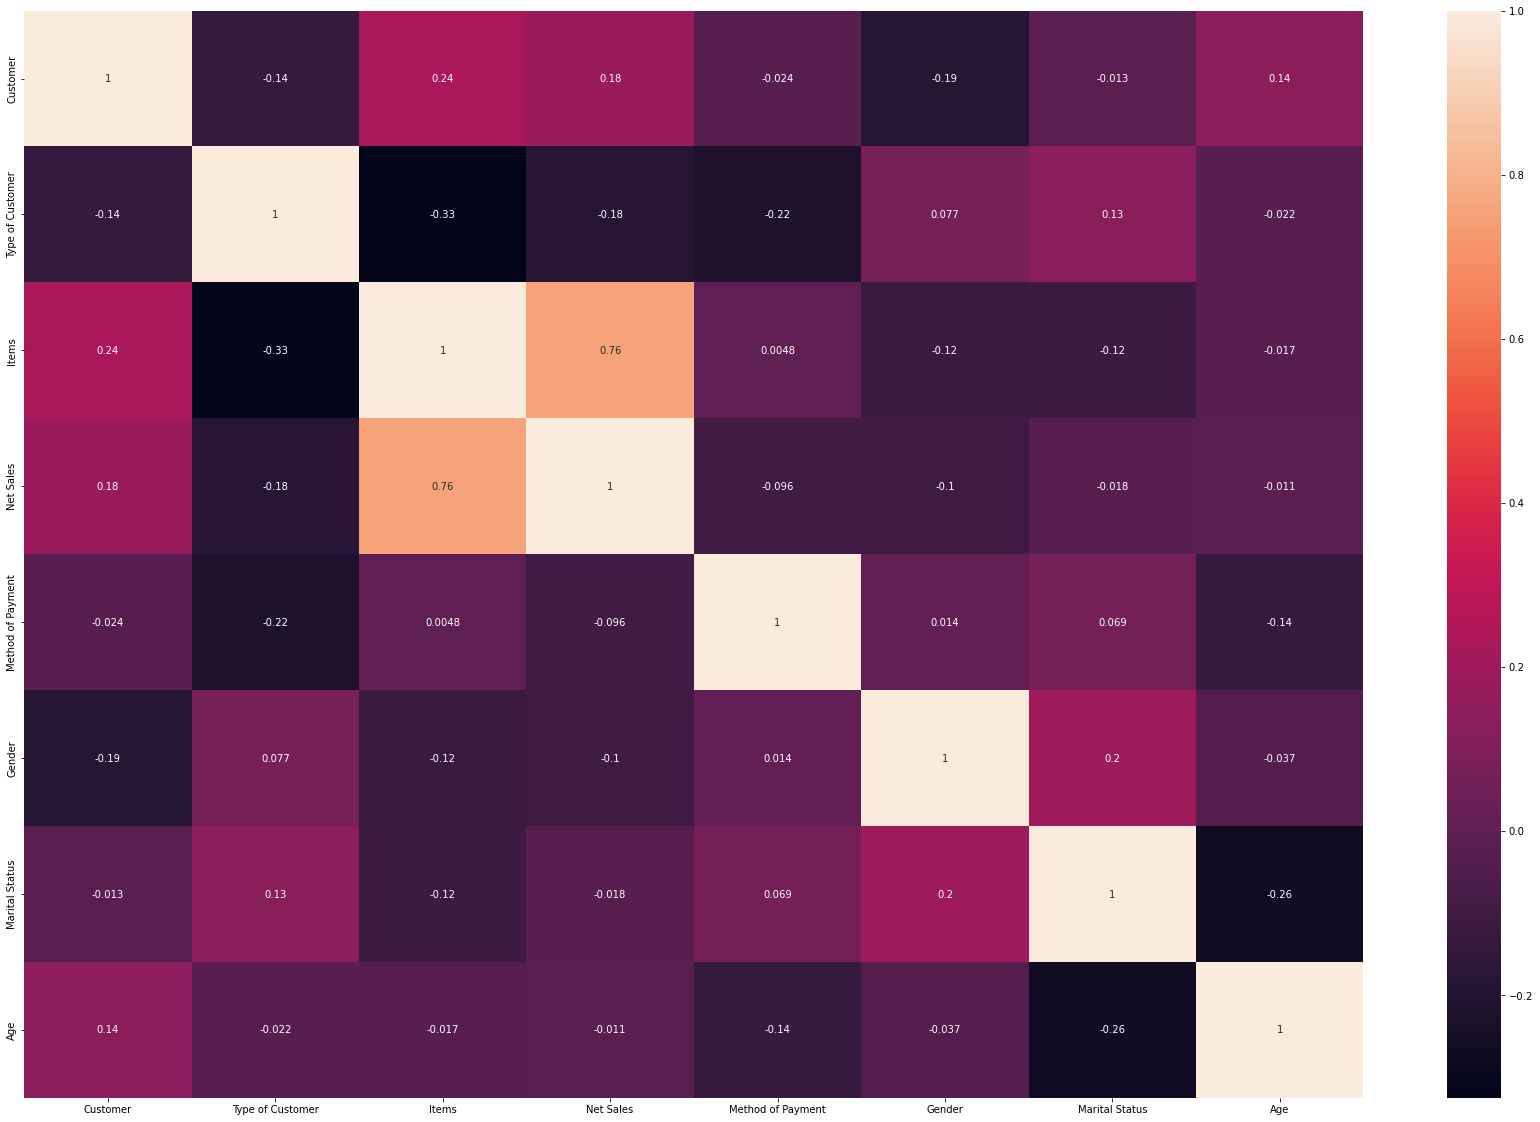

In [43]:
plt.subplots(figsize=(30,20))
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [46]:
#now separate dependent and independent variables for regression analysis
independent_variables=df1.drop(['Net Sales'],axis=1)
dependent_variable=df1['Net Sales']

In [47]:
# now for standardise the columns value we importing standard scaler library
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [48]:
independent_variables=StandardScaler().fit(independent_variables).transform(independent_variables)
independent_variables

array([[-1.71481604,  1.52752523, -0.81544934, -2.45945946,  3.64495738,
        -0.43643578, -0.89884388],
       [-1.68017329, -0.65465367, -0.81544934,  0.24324324, -0.27435163,
        -0.43643578, -0.5743515 ],
       [-1.64553055,  1.52752523, -0.81544934,  0.24324324, -0.27435163,
        -0.43643578, -0.89884388],
       [-1.6108878 , -0.65465367,  0.65382875,  0.24324324, -0.27435163,
        -0.43643578, -1.22333625],
       [-1.57624505,  1.52752523, -0.44812982, -1.10810811, -0.27435163,
        -0.43643578, -0.73659769],
       [-1.5416023 ,  1.52752523, -0.81544934, -1.10810811, -0.27435163,
        -0.43643578,  0.07463325],
       [-1.50695955, -0.65465367, -0.44812982,  0.24324324, -0.27435163,
        -0.43643578, -1.06109006],
       [-1.4723168 ,  1.52752523, -0.81544934,  1.59459459, -0.27435163,
        -0.43643578, -0.24985913],
       [-1.43767406, -0.65465367, -0.44812982,  0.24324324, -0.27435163,
        -0.43643578,  0.23687943],
       [-1.40303131,  1.5275

In [49]:
# now importing train test split for model building and importing regression models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.ensemble import RandomForestRegressor

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent_variables,dependent_variable,test_size=0.10,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((90, 7), (10, 7), (90,), (10,))

Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg
lin_reg.fit(X_train,y_train)
print(lin_reg.score(X_train,y_train))
print(lin_reg.score(X_test,y_test))
lin_reg_pred=lin_reg.predict(X_test)

0.5888617779509673
0.4819240561618088


In [52]:
from sklearn.metrics import r2_score
lin_reg_score=r2_score(y_test,lin_reg_pred)*100
print("Accuracy score for LR :",lin_reg_score)

Accuracy score for LR : 48.19240561618088


Ridge Regression

In [53]:
from sklearn.linear_model import Ridge
rr=Ridge()
rr
rr.fit(X_train,y_train)
print(rr.score(X_train,y_train))
print(rr.score(X_test,y_test))
rr_pred=rr.predict(X_test)

0.588776483370737
0.4788202962468122


In [54]:
from sklearn.metrics import r2_score
rr_score=r2_score(y_test,rr_pred)*100
print("Accuracy score for RidgeR :",rr_score)

Accuracy score for RidgeR : 47.88202962468122


Lasso Regression

In [55]:
from sklearn.linear_model import Lasso
lr=Lasso()
lr
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
lr_pred=lr.predict(X_test)

0.5862378790519358
0.5092121575526541


In [56]:
from sklearn.metrics import r2_score

lr_score=r2_score(y_test,lr_pred)*100
print("Accuracy score for LASR :",lr_score)

Accuracy score for LASR : 50.921215755265415


Random Forest 

In [57]:
rfr=RandomForestRegressor()
rfr

RandomForestRegressor()

In [58]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [59]:
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.9247042181213938
0.12547141410326534


In [60]:
rfr_pred=rfr.predict(X_test)

In [61]:
from sklearn.metrics import r2_score

rfr_score=r2_score(y_test,rfr_pred)*100
print("Accuracy score for RFR :",rfr_score)

Accuracy score for RFR : 12.547141410326535


Support vector Regressor

In [62]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)
print(svr.score(X_train,y_train))
print(svr.score(X_test,y_test))
svr_pred=svr.predict(X_test)
from sklearn.metrics import r2_score
svr_score=r2_score(y_test,svr_pred)*100
print("Accuracy score for LR :",svr_score)

-0.04483364418776126
-0.05807471189359559
Accuracy score for LR : -5.807471189359559


In [63]:
# comparing accuracy from all models
pd.DataFrame({"Model Names":['Linear Reg','Ridge Reg','Lasso Reg','RandomForest Reg','Support Vector Reg'],
            "Accuracy socre":[lin_reg_score,rr_score,lr_score,rfr_score,svr_score]})

,Model Names,Accuracy socre
0,Linear Reg,48.192406
1,Ridge Reg,47.882030
2,Lasso Reg,50.921216
3,RandomForest Reg,12.547141
4,Support Vector Reg,-5.807471


Lasso Regression has highest accuracy score so Lasso Regression model is best for the data

In [65]:
sample=pd.DataFrame({"Actual value":y_test,
             "Predicted value":np.round(lr_pred,2)})
sample

,Actual value,Predicted value
83,46.00,71.22
53,74.00,69.41
70,155.32,99.74
45,39.60,55.75
44,23.80,55.72
39,52.50,61.67
22,266.00,127.30
80,78.00,56.70
10,29.50,46.45
0,39.50,45.74
